C:\Users\Sailesh\.conda\envs\Main\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Sailesh\.conda\envs\Main\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    wpi   No. Observations:                  124
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -135.351
Date:                Tue, 22 Apr 2025   AIC                            278.703
Time:                        11:25:46   BIC                            289.951
Sample:                    01-01-1960   HQIC                           283.272
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0943      0.068      1.389      0.165      -0.039       0.227
ar.L1          0.8742      0.055     16.028      0.000       0.767       0.981
ma.L1         -0.4120      0.100     -4.119      0.0

C:\Users\Sailesh\.conda\envs\Main\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Sailesh\.conda\envs\Main\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 ln_wpi   No. Observations:                  124
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 382.427
Date:                Tue, 22 Apr 2025   AIC                           -756.854
Time:                        11:25:46   BIC                           -745.605
Sample:                    01-01-1960   HQIC                          -752.285
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.001      1.325      0.185      -0.001       0.003
ar.L1          0.8830      0.043     20.583      0.000       0.799       0.967
ma.L1         -0.4777      0.092     -5.190      0.0

C:\Users\Sailesh\.conda\envs\Main\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Sailesh\.conda\envs\Main\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Sailesh\.conda\envs\Main\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Sailesh\.conda\envs\Main\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                consump   No. Observations:                   92
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -340.508
Date:                Tue, 22 Apr 2025   AIC                            691.015
Time:                        11:25:49   BIC                            703.624
Sample:                    01-01-1959   HQIC                           696.105
                         - 10-01-1981                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.0609     56.643     -0.637      0.524    -147.078      74.957
m2             1.1220      0.036     30.825      0.000       1.051       1.193
ar.L1          0.9348      0.041     22.717      0.0

C:\Users\Sailesh\.conda\envs\Main\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Sailesh\.conda\envs\Main\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1419.548
Date:                Tue, 22 Apr 2025   AIC                           2847.097
Time:                        11:25:49   BIC                           2866.728
Sample:                             0   HQIC                          2854.558
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2633      0.218     -1.209      0.227      -0.690       0.164
ar.L1          0.7565      0.021     35.256      0.000       0.714       0.799
ma.L1          0.6736      0.026     26.377      0.0

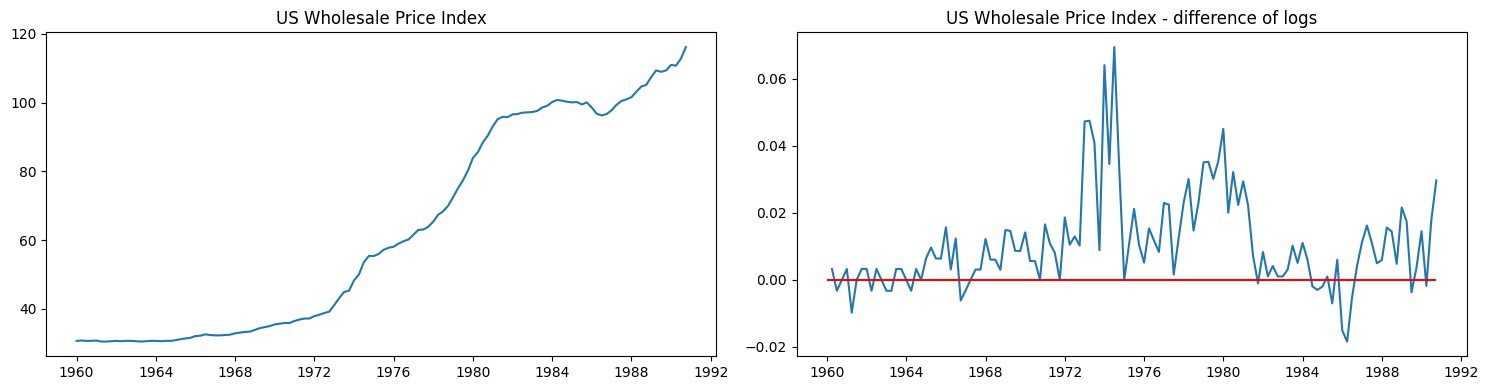

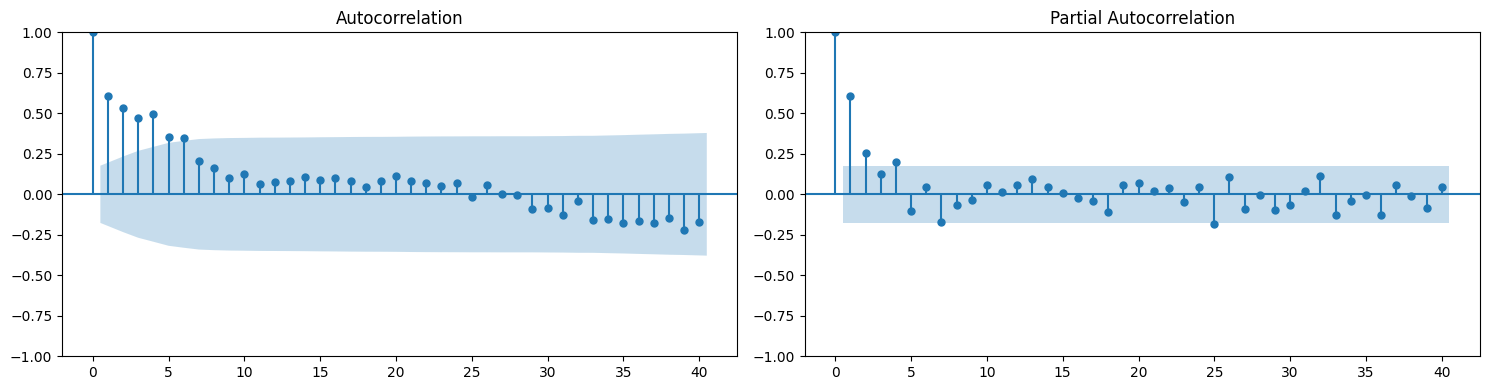

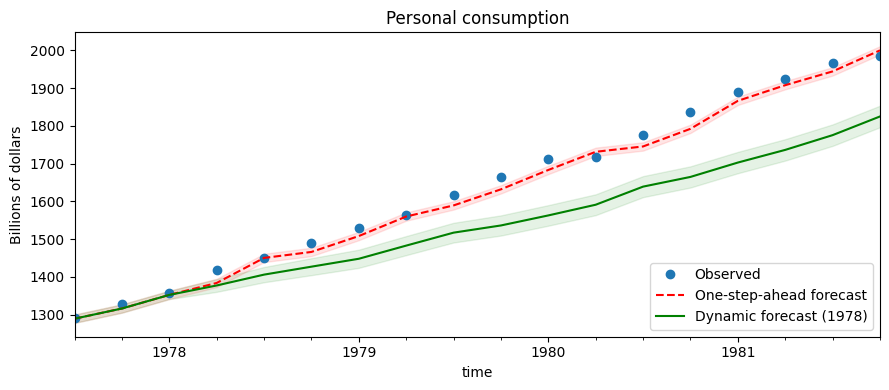

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO
from arch import arch_model

# Load and model WPI data
wpi1 = requests.get('https://www.stata-press.com/data/r12/wpi1.dta').content
data = pd.read_stata(BytesIO(wpi1))
data.index = data['t']

mod = sm.tsa.SARIMAX(data['wpi'], trend='c', order=(1,1,1))
res = mod.fit(disp=False)
print(res.summary())

# Log-diff transformation
data['ln_wpi'] = np.log(data['wpi'])
data['D.ln_wpi'] = data['ln_wpi'].diff()

fig, axes = plt.subplots(1, 2, figsize=(15,4))
axes[0].plot(data.index, data['wpi'], '-')
axes[0].set(title='US Wholesale Price Index')
axes[1].plot(data.index, data['D.ln_wpi'], '-')
axes[1].hlines(0, data.index[0], data.index[-1], 'r')
axes[1].set(title='US Wholesale Price Index - difference of logs')
plt.tight_layout()

fig, axes = plt.subplots(1, 2, figsize=(15,4))
sm.graphics.tsa.plot_acf(data['D.ln_wpi'].dropna(), lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(data['D.ln_wpi'].dropna(), lags=40, ax=axes[1])
plt.tight_layout()

mod = sm.tsa.SARIMAX(data['ln_wpi'], trend='c', order=(1,1,1))
res = mod.fit(disp=False)
print(res.summary())

# Airline data with SARIMA
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data = pd.read_stata(BytesIO(air2))
data.index = pd.date_range(start=datetime(int(data['time'][0]), 1, 1), periods=len(data), freq='MS')
data['lnair'] = np.log(data['air'])

mod = sm.tsa.SARIMAX(data['lnair'], order=(2,1,0), seasonal_order=(1,1,0,12), simple_differencing=True)
res = mod.fit(disp=False)
print(res.summary())

# Friedman consumption example
friedman2 = requests.get("https://www.stata-press.com/data/r12/friedman2.dta").content
data = pd.read_stata(BytesIO(friedman2))
data.index = data['time']

endog = data.loc['1959':'1981', 'consump']
exog = sm.add_constant(data.loc['1959':'1981', 'm2'])

mod = sm.tsa.SARIMAX(endog, exog, order=(1,0,1))
res = mod.fit(disp=False)
print(res.summary())

raw = pd.read_stata(BytesIO(friedman2))
raw.index = raw['time']
data = raw.loc[:'1981']
endog = data.loc['1959':, 'consump']
exog = sm.add_constant(data.loc['1959':, 'm2'])

mod = sm.tsa.SARIMAX(endog.loc[:'1978-01-01'], exog=exog.loc[:'1978-01-01'], order=(1,0,1))
fit_res = mod.fit(disp=False)
print(fit_res.summary())

mod = sm.tsa.SARIMAX(endog, exog=exog, order=(1,0,1))
res = mod.filter(fit_res.params)

predict = res.get_prediction()
predict_ci = predict.conf_int()
predict_dy = res.get_prediction(dynamic='1978-01-01')
predict_dy_ci = predict_dy.conf_int()

fig, ax = plt.subplots(figsize=(9,4))
ax.set(title='Personal consumption', xlabel='Date', ylabel='Billions of dollars')
data.loc['1977-07-01':, 'consump'].plot(ax=ax, style='o', label='Observed')
predict.predicted_mean.loc['1977-07-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['1977-07-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['1977-07-01':].plot(ax=ax, style='g', label='Dynamic forecast (1978)')
ci = predict_dy_ci.loc['1977-07-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)
ax.legend(loc='lower right')
plt.tight_layout()

# Simulate ARMA(1,1)
np.random.seed(123)
arparams = np.array([0.75])
maparams = np.array([0.65])
ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]
y = sm.tsa.arma_generate_sample(ar, ma, 1000)

model = sm.tsa.ARIMA(y, order=(1, 0, 1))
results = model.fit()
print(results.summary())

# Simulate ARIMA(1,1,1)
y = sm.tsa.arma_generate_sample(ar, ma, 1000)
model = sm.tsa.ARIMA(y, order=(1, 1, 1))
results = model.fit()
print(results.summary())

# Simulate SARIMA(1,1,1)(1,1,1,12)
seasonal_arparams = np.array([0.35])
seasonal_maparams = np.array([0.25])
seasonal_ar = np.r_[1, -seasonal_arparams]
seasonal_ma = np.r_[1, seasonal_maparams]
arma_process = sm.tsa.arma_generate_sample(ar, ma, 1000)
seasonal_arma_process = sm.tsa.arma_generate_sample(seasonal_ar, seasonal_ma, 1000)
y = arma_process + seasonal_arma_process

model = sm.tsa.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()
print(results.summary())

# Simulate and fit GARCH(1,1)
np.random.seed(123)
eps = np.random.normal(size=1000)
var = np.zeros_like(eps)
for t in range(1, len(eps)):
    var[t] = 0.1 + 0.8 * var[t-1] + 0.1 * eps[t-1]**2
y = np.sqrt(var) * eps

model = arch_model(y, vol='GARCH', p=1, q=1)
results = model.fit()
print(results.summary())
